Dictionary Learning for Denoising
=================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


This tour follows the _Dictionary Learning_ numerical tour.
It uses a learned dictionary to perform image denoising.

In [1]:
addpath('toolbox_signal')
addpath('toolbox_general')
addpath('solutions/sparsity_5_dictionary_learning_denoising')

Learning the Dictionary
-----------------------
We aim at applying the dictionary learning method to denoising.
We thus consider a noisy image obtained by adding Gaussian noise to a
clean, unknown image $f_0 \in \RR^N$ where $N=n_0 \times n_0$.


Noise level $\sigma$.

In [2]:
sigma = .06;

Size of the image.

In [3]:
n0 = 256;

Load the image.

In [4]:
name = 'barb';
f0 = rescale( crop(load_image(name),n0) );

Display $f_0$.

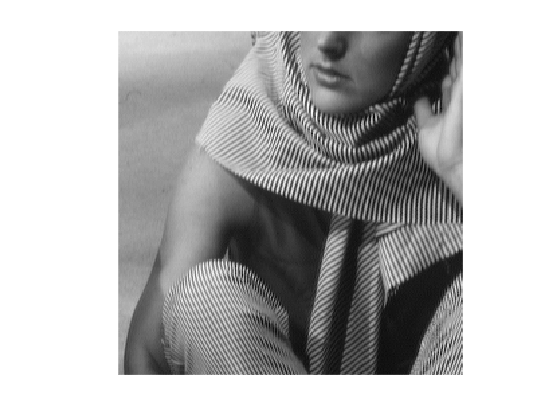

In [5]:
clf;
imageplot(f0);

Noisy observations $f=f_0+w$ where $w$ is a realization of $\Nn(0,\si^2\text{Id}_N)$.

In [6]:
f = f0 + sigma*randn(n0);

Display $f$.

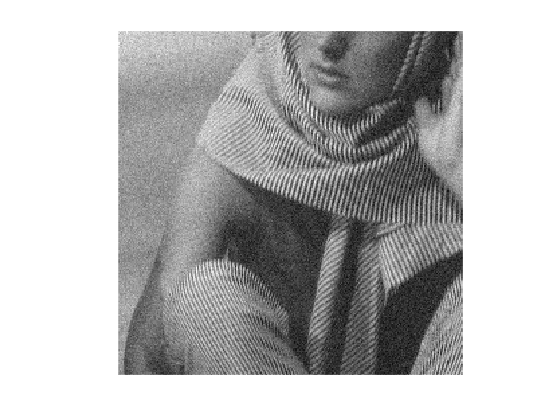

In [7]:
clf;
imageplot(f);

Perform the numerical tour on Dictionary Learning to obtain a dictionary
$D \in \RR^{n \times p}$

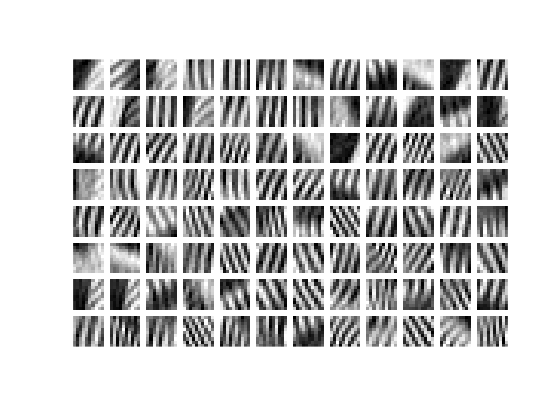

In [8]:
if not(exist('D'))
    addpath('m_files/')
    sparsity_4_dictionary_learning;
end

Width $w$ of the patches.

In [9]:
w = sqrt(size(D,1));

Number $p$ of atoms.

In [10]:
p = size(D,2);

Dimension $n= w \times w$ of the data to be sparse coded.

In [11]:
n = w*w;

Denoising by Sparse Coding
--------------------------
Here we apply sparse coding in the learned dictionary
to the problem of image denoising, as detailed in:


M. Elad and M. Aharon,
<http://ieeexplore.ieee.org/xpl/freeabs_all.jsp?arnumber=4011956 Image Denoising Via Sparse and Redundant representations over Learned Dictionaries>,
IEEE Trans. on Image Processing, Vol. 15, no. 12, pp. 3736-3745, December
2006.


The method first extract lots of patches from $f$, then perform sparse coding of
each patch in $D$, and then average the overlapping patch to obtained
the denoised image $f_1$.


We extract a large number $m$ of patches $Y = (y_j)_{j=1}^m \in \RR^{n
\times m}$ from the noisy image $f$.


To extract the patche, we use
$$ y_j(t) = f( a_j + t ) $$
where $a_j$ is the location of patch indexed by $j$.


In practice,
splitting $j=(j_1,j_2)$ as a 2-D index, we use $a_j = (j_1 q,j_2 q) $
where $q>0$ is an overlap factor ( so that setting $q=w$ implies no
overlap). Overlap is important to obtain good denoising performance
(reduced blocking artifact).

Define regularly space positions for the extraction of patches.

In [12]:
[y,x] = meshgrid(1:q:n0-w/2, 1:q:n0-w/2);
m = size(x(:),1);
Xp = repmat(dX,[1 1 m]) + repmat( reshape(x(:),[1 1 m]), [w w 1]);
Yp = repmat(dY,[1 1 m]) + repmat( reshape(y(:),[1 1 m]), [w w 1]);

In [13]:
size(x)

ans =

     1     1


Ensure boundary conditions (reflexion).

In [15]:
Xp(Xp>n0) = 2*n0-Xp(Xp>n0);
Yp(Yp>n0) = 2*n0-Yp(Yp>n0);

Extract the $m$ patches $Y$.

In [16]:
Y = f(Xp+(Yp-1)*n0);
Y = reshape(Y, [n, m]);

Save the mean $\theta_j$ of each patch appart, and remove it.

In [17]:
theta = mean(Y);
Y = Y - repmat( theta, [n 1] );

Denoising of the patches is obtained by performing a sparse coding of each patch $y_j$ in $D$
$$ \umin{\norm{D x_j - y_j} \leq \epsilon} \norm{x_j}_1. $$


The value of $\epsilon>0$ is set proportionaly to the noise level
$\sqrt{n}\sigma$ that contaminates each patch.
We denote $\rho \approx 1$ the proportionality factor, that is a
parameter of the method.

In [18]:
rho = .95;
epsilon = rho*sqrt(n)*sigma;

The sparse coding problem
can written equivalently in a way that is easier to deal using
proximal splitting schemes. We introduce an auxiliary variable $u=D x
\in \RR^n$ as follow
$$ \umin{ z=(x,u) \in \RR^p \times \RR^n } F(z) + G(z) $$
where for $z=(x,u)$, one defines
$$ F(x,u) = \norm{x}_1 + \iota_{B_\epsilon(y)}(u)
  \qwhereq  B_\epsilon(y) = \enscond{u}{ \norm{u-y} \leq \epsilon } $$
and
$$ G(x,u) = \iota_{\Cc}(x,u) \qwhereq \Cc = \enscond{(x,u)}{ u=D x }. $$


Here we included the constraints
using characteristic functions
 $$ \iota_{A}(z) = \choice{
      0 \qifq z \in A, \\
      +\infty \quad \text{otherwise}. } $$

Douglas-Rachford Algorithm
--------------------------
To minimize the sparse coding problem, we make use of a proximal
splitting scheme to minimize an energy of the form $F(z)+G(z)$.
These schemes are adapted to solve structured non-smooth
optimization problem.


They basically replace the traditional gradient-descent step (that is not
available because neither $F$ nor $G$ are smooth functionals) by
proximal mappings, defined as
$$ \text{Prox}_{\gamma F}(z) = \uargmin{y} \frac{1}{2}\norm{z-y}^2 + \ga F(y) $$
(the same definition applies also for $G$).


The Douglas-Rachford (DR) algorithm is an iterative scheme to minimize
functionals of the form
$$ \umin{z} F(z) + G(z) $$
where $F$ and $G$ are convex functions for which one is able to
comptue the proximal mappings $ \text{Prox}_{\gamma F} $ and
$ \text{Prox}_{\gamma G} $.


The important point is that $F$ and $G$ do not need to be smooth.
One onely needs then to be "proximable".


A DR iteration reads
$$ \tilde z_{k+1} = \pa{1-\frac{\mu}{2}} \tilde z_k +
  \frac{\mu}{2} \text{rPox}_{\gamma G}( \text{rProx}_{\gamma F}(\tilde z_k)  )
  \qandq z_{k+1} = \text{Prox}_{\gamma F}(\tilde z_{k+1},) $$



We have use the following shortcuts:
$$   \text{rProx}_{\gamma F}(z) = 2\text{Prox}_{\gamma F}(z)-z $$


It is of course possible to inter-change the roles of $F$ and $G$,
which defines another set of iterations.


One can show that for any value of $\gamma>0$, any $ 0 < \mu < 2 $,
and any $\tilde z_0$, $z_k \rightarrow z^\star$
which is a minimizer of $F+G$.


Please note that it is actually $z_k$ that converges, and not $\tilde
z_k$.


To learn more about this algorithm, you can read:


_Proximal Splitting Methods in Signal Processing_, Patrick L. Combettes
and Jean-Christophe Pesquet, in: Fixed-Point Algorithms for Inverse
Problems in Science and Engineering, New York: Springer-Verlag, 2010.

Douglas-Rachford for Sparse Coding
----------------------------------
In the special case of the constrained sparse coding problem,
the proximal mapping of $G$ is the orthogonal projection on the convex
set $\Cc$:
$$ (\tilde x, \tilde u) = \text{Prox}_{\ga G}(x,u) = \text{Proj}_\Cc(x,u). $$


It can be computed by solving a linear system of equations since
$$ \tilde u = D \tilde x \qwhereq
      \tilde x = (\text{Id} + D^* D)^{-1}(f + D^* u).  $$


Define Proj$_\Cc$, by pre-compuring the inverse of $\text{Id} + D^* D$.

In [19]:
U = (eye(p) + D'*D)^(-1);
Replicate = @(z)deal(z, D*z);
ProjC = @(x,u)Replicate( U*( x + D'*u ) );

One has $\text{Prox}_{\ga G} = \text{Proj}_{\Cc}$, whatever the value
of $\ga$.

In [20]:
ProxG = @(f,u,gamma)ProjC(f,u);

Function $F(x,u)$ is actully a separable sum of a function
that only depends on $x$ and a function that depends only on $u$:
$$ F(x,u) = \iota_{B_\epsilon(y)}(u) + \norm{x}_1. $$
The proximal operator of $F$ reads
$$ \text{Prox}_{\ga F}(x,u) =
      (   \text{Proj}_{B_\epsilon(y)}(u),
          \text{Prox}_{\ga \norm{\cdot}_1 }(x) ).  $$


In order to speed up the implementation, the DR algorithm
will be performed in parallel on all the $x_j$.
We thus define $y=Y$ to be the set of all the patches.

In [21]:
y = Y(:,1:m);

Define the projector
$$  \text{Proj}_{B_\epsilon(y)}(u) = y + (u-y) \max\pa{1 , \frac{\epsilon}{\norm{u-y}} }$
$$

In [22]:
amplitude = @(a)repmat( sqrt(sum(a.^2,1)), [n 1] );
ProjB = @(u)y + (u-y) .* min(1, epsilon./amplitude(u-y) );

The proximal operator of the $ \ell^1 $ norm $\norm{\cdot}_1$
is a soft thresholding:
$$ \text{Prox}_{\ga \norm{\cdot}_1}(x)_i =
      \max\pa{ 0, \frac{\ga}{\abs{x_i}} } x_i. $$

In [23]:
ProxL1 = @(x,gamma)max(0,1-gamma./max(1e-9, abs(x))) .* x;

Define the proximal operator of $F$.

In [24]:
ProxF = @(x,u,gamma)deal( ProxL1(x,gamma), ProjB(u) );

Set the value of $\mu$ and $\gamma$.
You might consider using your own value to speed up the convergence.

In [25]:
mu = 1;
gamma = 1;

Number of iterations.

In [26]:
niter = 800;

__Exercise 1__

Implement the DR iterative algorithm on |niter| iterations.
Keep track of the evolution of the minimized energy
$ \norm{x}_1 $ during the iterations.

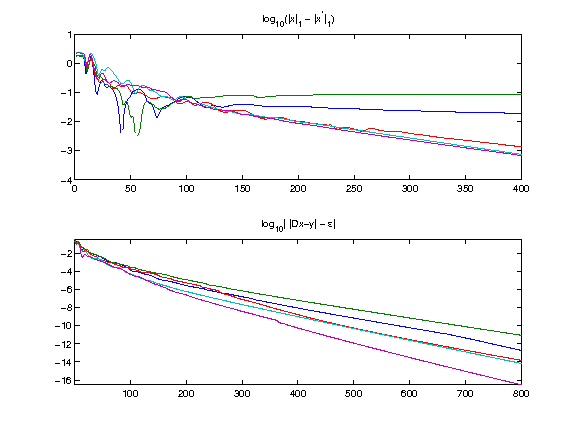

In [27]:
exo1()

In [28]:
%% Insert your code here.

Patch Averaging
---------------
Once each $x_j$ is computed, one obtains the denoised patch $\tilde
y_j = D x_j$. These denoised patches are then aggregated together to
obtained the denoised image:
$$
      f_1(t) = \frac{1}{W_t} \sum_j \tilde y_j(t-a_j)
$$
where $W_t$ is the number of patches that overlap at a given pixel
location $t$ (note that in this formula, we assumed $\tilde y_j(t-a_j)=0$ when $t-a_j$
falls outside the patch limits).



Approximated patches $ Y_1 = (\tilde y_j)_j  = D X$.

In [29]:
Y1 = reshape(D*x, [w w m]);

Insert back the mean.

In [30]:
Y1 = Y1 - repmat( mean(mean(Y1)), [w w] );
Y1 = Y1 + reshape(repmat( theta, [n 1] ), [w w m]);

To obtain the denoising, we average the value of the approximated patches
$ Y_1 $ that overlap.

In [31]:
W = zeros(n0,n0);
f1 = zeros(n0,n0);
for i=1:m
    x = Xp(:,:,i); y = Yp(:,:,i);
    f1(x+(y-1)*n0) = f1(x+(y-1)*n0) + Y1(:,:,i);
    W(x+(y-1)*n0) = W(x+(y-1)*n0) + 1;
end
f1 = f1 ./ W;

Display the result.

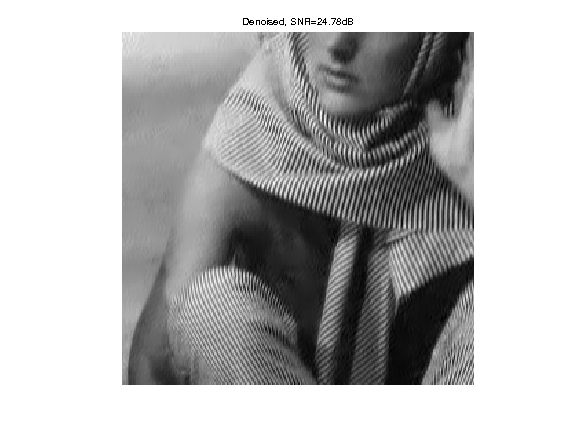

In [32]:
clf;
imageplot(clamp(f1), ['Denoised, SNR=' num2str(snr(f0,f1),4) 'dB']);

__Exercise 2__

Compare the obtained result with translation invariant wavelet hard
thresholding.

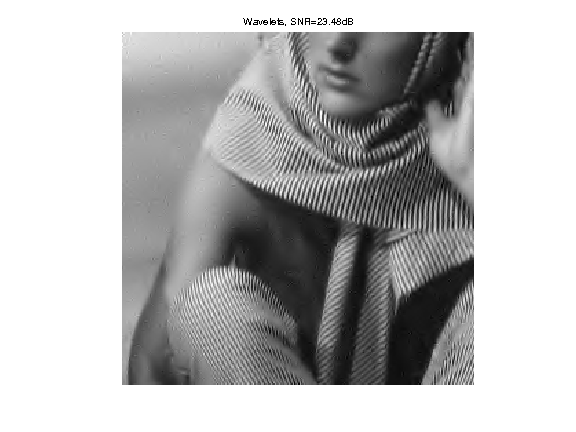

In [33]:
exo2()

In [34]:
%% Insert your code here.

__Exercise 3__

Study the influence of the parameter $\rho$ on the quality of the
denoising. Study the influence of the number $p$ of atoms.

In [35]:
exo3()

In [36]:
%% Insert your code here.